In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import sklearn.metrics as met
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import seaborn as sns

**Question 2a)**

In [ ]:
def load_data(csvFile):

    # read csv to dataframe and replace NAs w/ 0
    df = pd.read_csv(csvFile)
    df = df.fillna(0)

    # Define the labelled target column and drop it from the independant variables
    Target = df['Dataset']
    df = df.drop(columns = ['Dataset'])

    # Convert the Gender data to quantitative values
    df['Gender'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)

    # Generate train test split
    X_train, X_test, y_train, y_test = train_test_split(df, Target, test_size=0.3,
                                                        random_state = 1)

    # Split test data further into test/validation
    X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.3,
                                                        random_state = 1)

    return(X_train, y_train, X_valid, y_valid, X_test, y_test)

In [ ]:
# Load the data for use
X_train, y_train, X_valid, y_valid, X_test, y_test = load_data('hw1_data.csv')

#test print to check if data was properly split
#print(len(X_train), len(y_train), len(X_valid), len(y_valid), len(X_test), len(y_test))

In [ ]:
def select_rf_model(X_train, y_train, X_valid, y_valid, X_test, y_test):

  # Define n_estimators
  n_estimators = [10, 20, 50, 100]

  # Initial empty lists to store generated accuracies
  ValidAccuracies = []
  TrainAccuracies = []

  # For each n, fit the model on the training data and predict 
  # training and validation accuracies, storing and plotting the respective them
  for n in n_estimators:
      model = RandomForestClassifier(n_estimators = n)
      model.fit(X_train, y_train)

      train_pred = model.predict(X_train)

      TrainAccuracies.append(met.accuracy_score(y_train, train_pred))

      val_pred = model.predict(X_valid)

      ValidAccuracies.append(met.accuracy_score(y_valid, val_pred))

  # Cat the results into a dataframe for easier visualizaiton
  nAccuracies = pd.DataFrame(zip(n_estimators, TrainAccuracies, ValidAccuracies), 
                            columns = ['n_Estimators', 'Train Accuracy', 'Validation Accuracy'])

  # Plot the training accuracy for each value of k
  plt.plot(n_estimators, nAccuracies['Train Accuracy'], 'b-', label='Training Accuracy')

  # Plot the validation accuracy for each value of k
  plt.plot(n_estimators, nAccuracies['Validation Accuracy'], 'r-', label='Validation Accuracy')

  plt.xlabel("n")
  plt.ylabel("Accuracy")
  plt.title("Accuracy for RF")
  plt.legend(loc='best')
  plt.show()

  return(nAccuracies)

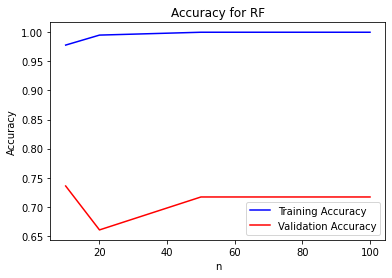

,n_Estimators,Train Accuracy,Validation Accuracy
0,10,0.977941,0.735849
1,20,0.995098,0.660377
2,50,1.000000,0.716981
3,100,1.000000,0.716981


In [ ]:
select_rf_model(X_train, y_train, X_valid, y_valid, X_test, y_test)
# Selecting an n_estimator of 10 seems to consistently perform on par with other
# values while giving a lower train accuracy. I will choose this to avoid
# over-fitting while still maintaining a reasonable accuracy

In [ ]:
# best n_estimator selected and used on test data

# Initiate the model with an n_estimator corresponding to the highest validation accuracy
model = RandomForestClassifier(n_estimators=10)

# Fit the model on the training data
model.fit(X_train, y_train)

# employ the model on the test data
test_pred = model.predict(X_test)

# Compute the accuracy score for the test predictions
test_accuracy = met.accuracy_score(y_test, test_pred)

print(test_accuracy)

# The model with an n_estimator corresponding to the highest validation accuracy
# achieves an accuracy score of ~0.7377049180327869 on the test data

0.680327868852459


**Question 2a)** Comparing results from all 4 of my models, The random forest with 10 n_estimators and logistic regression both achieved test accuracies of approximately 73.77%, whereas the KNN achieved a test accuracy of 71.31% and the decision tree 59.02%. While the actual test accuracy varies with each run, it seems that the random forest with n_estimator = 10 and logistic regression models were the most accurate on the test data.

**Question 2b)**

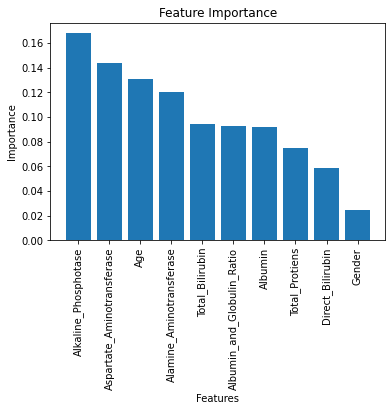

In [ ]:
# Initiate the model with an n_estimator corresponding to the highest validation accuracy
model = RandomForestClassifier(n_estimators=10)

# Fit the model on the training data
model.fit(X_train, y_train)

# Use the feature_importances_ method
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title and labels
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

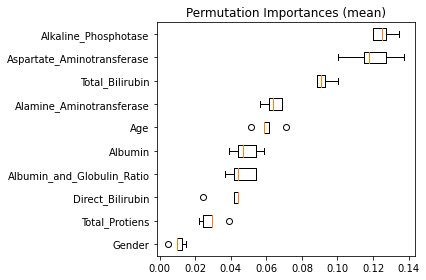

In [ ]:
# using permutation method

result = permutation_importance(model, X_train, y_train, scoring='accuracy')

# Get the sorted indices of feature importances
sorted_idx = result.importances_mean.argsort()

# Plot the feature importances
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (mean)")
fig.tight_layout()
plt.show()

**Question 2b)** While in general both models seem to identify certain features that are more important such as Alamine_aminotransferase and some that are less important such as gender, the ranking of importance is not exactly the same between the two methods.

**Question 3a)**

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.9, 0.1], 
                           random_state=55)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=55, stratify=y)

Accuracy: 0.93
Precision: 0.72
Recall: 0.58
F1 score: 0.64


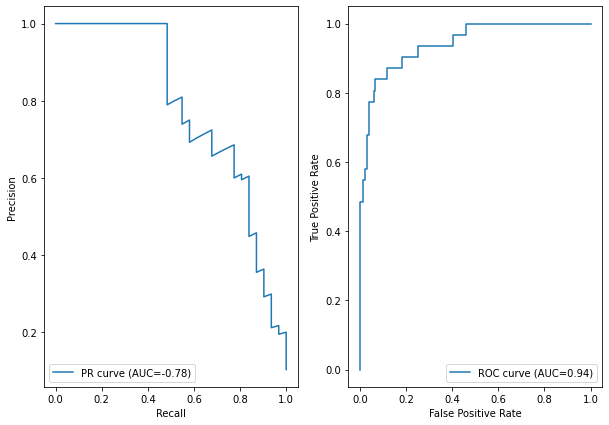

In [ ]:
# Instantiate a LogisticRegression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Use the model to predict the labels for the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance using various metrics
acc = met.accuracy_score(y_test, y_pred)
prec = met.precision_score(y_test, y_pred)
rec = met.recall_score(y_test, y_pred)
f1 = met.f1_score(y_test, y_pred)

# Print the evaluation metrics to the console
print("Accuracy: {:.2f}".format(acc))
print("Precision: {:.2f}".format(prec))
print("Recall: {:.2f}".format(rec))
print("F1 score: {:.2f}".format(f1))

# Use the model to predict the probabilities of each label for the test data
y_prob = model.predict_proba(X_test)[:,1]

# Compute the precision and recall values for different probability thresholds
precision, recall, _ = met.precision_recall_curve(y_test, y_prob)

# Compute the false positive rate and true positive rate for different probability thresholds
fpr, tpr, _ = met.roc_curve(y_test, y_prob)

# Compute the area under the precision-recall and ROC curves
auc_pr = np.trapz(precision, recall)
auc_roc = met.roc_auc_score(y_test, y_prob)

# Plot the precision-recall and ROC curves
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.plot(recall, precision, label='PR curve (AUC={:.2f})'.format(auc_pr))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.subplot(122)
plt.plot(fpr, tpr, label='ROC curve (AUC={:.2f})'.format(auc_roc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


**Question 3b)** A common way that we can improve recall without ruining precision in the case of imbalanced data is it alter the threshold used to predict positive labels. Because we have an imbalanced dataset and the positive class is rare in this case, we can decrease the threshold to classify more instances as positive. This method does increase the chances of classifying false positives as a trade off.

Accuracy: 0.86
Precision: 0.42
Recall: 0.87
F1 score: 0.56


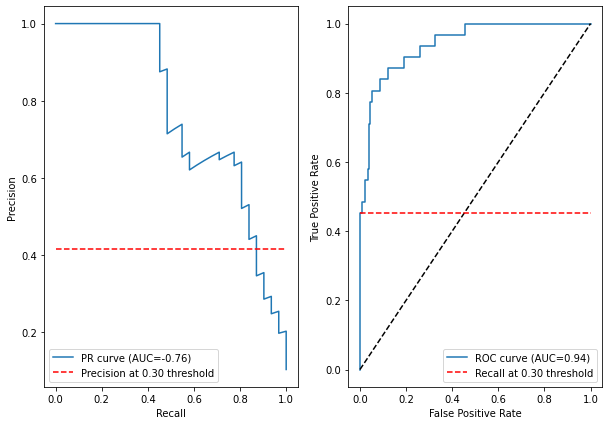

In [ ]:
# Question 3b) implemented:

# Instantiate a LogisticRegression model with the 'balanced' class weight option
model = LogisticRegression(class_weight='balanced')

# Train the model on the training data
model.fit(X_train, y_train)

# Use the model to predict the probabilities of each label for the test data
y_prob = model.predict_proba(X_test)[:,1]

# Use a new threshold to predict the labels for the test data, with the aim of 
# improving recall
new_threshold = 0.3
y_pred = (y_prob >= new_threshold).astype(int)

# Evaluate the new model's performance using various metrics
acc = met.accuracy_score(y_test, y_pred)
prec = met.precision_score(y_test, y_pred)
rec = met.recall_score(y_test, y_pred)
f1 = met.f1_score(y_test, y_pred)

# Print the evaluation metrics to the console
print("Accuracy: {:.2f}".format(acc))
print("Precision: {:.2f}".format(prec))
print("Recall: {:.2f}".format(rec))
print("F1 score: {:.2f}".format(f1))

# Compute the precision and recall values for different probability thresholds
precision, recall, _ = met.precision_recall_curve(y_test, y_prob)

# Compute the false positive rate and true positive rate for different probability thresholds
fpr, tpr, _ = met.roc_curve(y_test, y_prob)

# Compute the area under the precision-recall and ROC curves
auc_pr = np.trapz(precision, recall)
auc_roc = met.roc_auc_score(y_test, y_prob)

# Plot the precision-recall and ROC curves
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.plot(recall, precision, label='PR curve (AUC={:.2f})'.format(auc_pr))
plt.plot([0, 1], [prec, prec], 'r--', label='Precision at {:.2f} threshold'.format(new_threshold))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.subplot(122)
plt.plot(fpr, tpr, label='ROC curve (AUC={:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [tpr[np.argmax(tpr >= new_threshold)], tpr[np.argmax(tpr >= new_threshold)]],
         'r--', label='Recall at {:.2f} threshold'.format(new_threshold))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

**Question 3b)** By lowering the threshold, I was able to improve the recall by about 30%, however, my precision was also dropped by about 30%.

**Question 6**

In [ ]:
# Function to read data from csv and split it into train/validation/test groups
def load_data(csvFile):

    # read csv to dataframe
    df = pd.read_csv(csvFile)

    df['Cell Type'].replace(['B', 'CD14 Monocytes'],
                        [0, 1], inplace=True)

    # Define the labelled target column and drop it from the independant variables
    Target = df['Cell Type']
    df = df.drop(columns = ['Cell Type'])

    # Generate train test split
    X_train, X_test, y_train, y_test = train_test_split(df, Target, test_size=0.3,
                                                        random_state = 1)

    return(X_train, y_train, X_test, y_test)

In [ ]:
X_train, y_train, X_test, y_test = load_data('hw2_data.csv')

In [ ]:
data = pd.read_csv('hw2_data.csv')

# define feature names
feature_names = X_train.columns

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Get the feature importance scores for the top 30 features
top_30_features = np.argsort(model.feature_importances_)[::-1][:30]

gene_names = data.columns[1:]

top_30_gene_names = gene_names[top_30_features]

mean_expression_levels = data.groupby('Cell Type')[top_30_gene_names].mean()

# Create heatmap using seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(mean_expression_levels, ax=ax, cmap='coolwarm')

# Set the title and axis labels
ax.set_title('Mean expression levels of top 30 genes by cell type')
ax.set_xlabel('Genes')
ax.set_ylabel('Cell type')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

NameError: ignored

In [ ]:
df = pd.read_csv('hw2_data.csv')

model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using accuracy metrics
accuracy = np.mean(y_test == y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Get the feature importances
importances = model.coefs_[0].mean(axis=1)

# Get the indices of the top 30 genes based on their importance
top30_idx = np.argsort(importances)[::-1][:30]

gene_names = df.columns[1:]

top_30_gene_names = gene_names[top_30_features]

mean_expression_levels = data.groupby('Cell Type')[top_30_gene_names].mean()

# Create heatmap using seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(mean_expression_levels, ax=ax, cmap='coolwarm')

# Set the title and axis labels
ax.set_title('Mean expression levels of top 30 genes by cell type')
ax.set_xlabel('Genes')
ax.set_ylabel('Cell type')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

**Quesiton 6b)** The reported accuracy for both models is near one. This means that the cell types are likely very unrelated. This makes sense considering B cells and Monocytes are very differentiated from their last common progenitor. This is also visible in the heatmaps where each gene that is a strong indicator of one of the cells, is generally a negative indicator of the other. 